<a href="https://colab.research.google.com/github/vicmcl/deeplearwing/blob/main/deeplearwing/notebook/training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
%reload_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import os
import glob

In [3]:
!git clone https://github.com/vicmcl/deeplearwing.git

Cloning into 'deeplearwing'...
remote: Enumerating objects: 130, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 130 (delta 36), reused 56 (delta 23), pack-reused 50
Receiving objects: 100% (130/130), 30.46 MiB | 11.37 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [4]:
DATASET = "victorienmichel/deeplearwing"
CONTENT_PATH = Path('/content')
PROJECT_PATH = CONTENT_PATH / 'deeplearwing'
DATA_PATH = PROJECT_PATH / 'data'
ZIP_FILE = DATASET.split('/')[-1].lower() + '.zip'

In [104]:
!cd {PROJECT_PATH} && git pull origin main
!cp -r {PROJECT_PATH / 'deeplearwing' / 'src'} {CONTENT_PATH}

remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 11 (delta 5), reused 11 (delta 5), pack-reused 0
Unpacking objects: 100% (11/11), 1.31 KiB | 269.00 KiB/s, done.
From https://github.com/vicmcl/deeplearwing
 * branch            main       -> FETCH_HEAD
   67fd797..87173c3  main       -> origin/main
Updating 67fd797..87173c3
Fast-forward
 deeplearwing/src/__init__.py   |  3 ++-
 deeplearwing/src/checkpoint.py | 18 ++++++++++++++++++
 deeplearwing/src/plot.py       |  4 ++--
 3 files changed, 22 insertions(+), 3 deletions(-)
 create mode 100644 deeplearwing/src/checkpoint.py


In [6]:
if not os.path.exists(DATA_PATH):
    print(f'Creating {DATA_PATH}')
    os.makedirs(DATA_PATH)

if not glob.glob(str(DATA_PATH / '*.csv')):

    if not os.path.exists(PROJECT_PATH / ZIP_FILE):
        !kaggle datasets download -d {DATASET} -p {DATA_PATH}

    !unzip {DATA_PATH / ZIP_FILE} -d {DATA_PATH}
    !rm {DATA_PATH / ZIP_FILE}

Creating /content/deeplearwing/data
Dataset URL: https://www.kaggle.com/datasets/victorienmichel/deeplearwing
License(s): MIT
 71% 13.0M/18.3M [00:00<00:00, 64.6MB/s]
100% 18.3M/18.3M [00:00<00:00, 69.6MB/s]
Archive:  /content/deeplearwing/data/deeplearwing.zip
  inflating: /content/deeplearwing/data/DeepLearWing.csv  


In [7]:
!pip install -q aerosandbox
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.2 MB/s eta 0:00:00


In [8]:
import sys
sys.modules['google.colab'] == True

False

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from src.features import string_to_floats
from src.plot import airfoil_to_image
from src.checkpoint import checkpoint

In [10]:
df = pd.read_csv(DATA_PATH / 'DeepLearWing.csv')
df.head()

,name,angle,reynolds,x_coords,y_coords,cd,cl,cm
0,2032c,-8.75,200000,1.0 0.95 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.25 0.2 ...,0.0016 0.0124 0.0229 0.0428 0.061 0.0771 0.090...,0.09761,-0.1581,-0.0262
1,2032c,-8.50,200000,1.0 0.95 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.25 0.2 ...,0.0016 0.0124 0.0229 0.0428 0.061 0.0771 0.090...,0.09468,-0.1536,-0.0262
2,2032c,-8.25,200000,1.0 0.95 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.25 0.2 ...,0.0016 0.0124 0.0229 0.0428 0.061 0.0771 0.090...,0.10671,-0.2407,-0.0219
3,2032c,-8.00,200000,1.0 0.95 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.25 0.2 ...,0.0016 0.0124 0.0229 0.0428 0.061 0.0771 0.090...,0.10247,-0.2303,-0.0213
4,2032c,-7.75,200000,1.0 0.95 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.25 0.2 ...,0.0016 0.0124 0.0229 0.0428 0.061 0.0771 0.090...,0.09947,-0.2229,-0.0215


In [88]:
n_samples = 10_000
df_s = df.sample(n = n_samples, random_state = 42)

In [89]:
mms = MinMaxScaler()

targets = ['cd', 'cl', 'cm']
df_s[targets] = mms.fit_transform(df_s[targets])
df_s['target'] = df_s.apply(lambda row: [row[t] for t in targets], axis = 1)
df_s = df_s.drop(columns = targets)

df_s[['angle', 'reynolds']] = mms.fit_transform(df_s[['angle', 'reynolds']])

In [90]:
df_s.loc[:, ['x_coords', 'y_coords']] = df_s[['x_coords', 'y_coords']].applymap(string_to_floats)

In [91]:
df_s.head()

,name,angle,reynolds,x_coords,y_coords,target
51063,fx84w127,0.823899,0.157895,"[1.0, 0.99893, 0.99572, 0.99039, 0.98296, 0.97...","[0.0, 0.00011, 0.0005, 0.0012, 0.0023, 0.00385...","[0.16410609714088875, 0.760406247595599, 0.437..."
802509,s8052,0.308176,0.052632,"[1.0, 0.99803, 0.99231, 0.98301, 0.97022, 0.95...","[0.0, 0.00018, 0.00079, 0.00181, 0.0033, 0.005...","[0.16927316569066483, 0.28383473109179047, 0.4..."
419227,goe505,0.301887,0.000000,"[1.0, 0.94959, 0.89918, 0.7985, 0.69791, 0.597...","[0.0, 0.01784, 0.03568, 0.06537, 0.09105, 0.10...","[0.4231140199793318, 0.34741350568079815, 0.46..."
132195,npl9660,0.735849,0.157895,"[1.0, 0.997614, 0.990418, 0.9785, 0.961985, 0....","[0.0013, 0.001763, 0.002031, 0.002194, 0.00332...","[0.07240785394419566, 0.7069067220640661, 0.49..."
542560,fx78k161,0.213836,0.473684,"[1.0, 0.99893, 0.99572, 0.99039, 0.98296, 0.97...","[0.0, 0.00103, 0.00172, 0.00262, 0.00365, 0.00...","[0.09951774026868758, 0.2525967530968685, 0.35..."


In [92]:
import concurrent.futures

with concurrent.futures.ThreadPoolExecutor() as executor:
    futures = [executor.submit(airfoil_to_image, row['x_coords'], row['y_coords'], 384, 128) for _, row in df_s.iterrows()]
    results = [future.result() for future in futures]

In [95]:
df_s['pixel_values'] = results
df_s = df_s.drop(columns = ['x_coords', 'y_coords'])

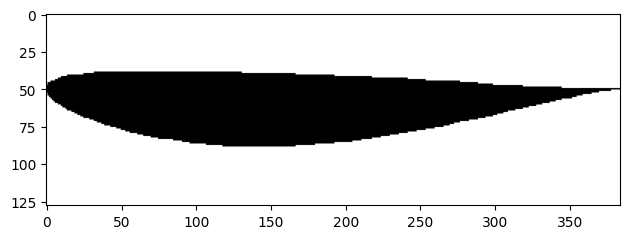

In [96]:
plt.imshow(results[0], cmap = 'gray')
plt.tight_layout()
plt.show()

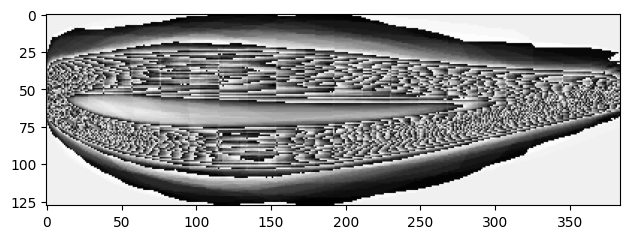

In [103]:
avg_airfoil = np.mean(df_s['pixel_values'], axis = 0)
plt.imshow(avg_airfoil, cmap='gray')
plt.tight_layout()

In [69]:
features = ['name', 'angle', 'reynolds', 'pixel_values']

X_train, X_test, y_train, y_test = train_test_split(
    df_s[features],
    df_s['target'],
    test_size = 0.2,
    random_state = 42,
    stratify = df_s[['reynolds']]
)

In [70]:
X_train.head()

,name,angle,reynolds,pixel_values
333607,s805a-nr,0.364780,1.000000,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
159382,th25816,0.345912,0.157895,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
814009,ua79sf18,0.635220,0.052632,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
626594,naca663218,0.383648,0.473684,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."
428048,goe685,0.867925,0.000000,"[[255, 255, 255, 255, 255, 255, 255, 255, 255,..."


In [83]:
from tensorflow.random import set_seed

from tensorflow.keras import backend, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Dense,
    Flatten,
    Dropout,
    BatchNormalization,
    Concatenate,
)

In [ ]:
# Sequential model
model = Sequential(
    name = "Light_CNN",
    layers = [
        Input(shape = (64, 64, 3)),
        Conv2D(
            filters = 32,
            kernel_size = 2,
            padding = "same",
            activation = "relu",
        ),
        MaxPooling2D(pool_size = 2),
        Dropout(rate = 0.3),
        Conv2D(
            filters = 64,
            kernel_size = 2,
            padding = "same",
            activation = "relu",
        ),
        MaxPooling2D(pool_size = 2),
        Dropout(rate = 0.3),
        Flatten(),
        Dense(units = 128, activation = "relu"),
        Dropout(rate = 0.5),
        Dense(3, activation = 'softmax')
    ]
)

model.summary()
model.compile(
    loss="mse",
    optimizer = Adam(learning_rate = 0.0005),
    metrics = ["mae"]
)

history = model.fit(
    X_train,
    y_train,
    epochs = 100,
    callbacks = checkpoint("weights_light_cnn.keras", patience = 3),
    validation_split = 0.2,
    batch_size = 32,
    verbose = 1
)